<a href="https://colab.research.google.com/github/FreakyOne700/NaturalLanguageProcessing/blob/main/SpamDetection/SpamDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [ ]:
!wget https://kaggle.com/uciml/sms-spam-collection-dataset


--2024-04-17 14:01:06--  https://kaggle.com/uciml/sms-spam-collection-dataset
Resolving kaggle.com (kaggle.com)... 35.244.233.98
Connecting to kaggle.com (kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.kaggle.com/uciml/sms-spam-collection-dataset [following]
--2024-04-17 14:01:06--  https://www.kaggle.com/uciml/sms-spam-collection-dataset
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /datasets/uciml/sms-spam-collection-dataset [following]
--2024-04-17 14:01:07--  https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
Reusing existing connection to www.kaggle.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘sms-spam-collection-dataset’

sms-spam-collection     [ <=>                ]  12.29K  --.-KB/s    in 0

In [ ]:
df = pd.read_csv('spam.csv',encoding = 'ISO-8859-1')


In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.columns = ['labels','data']

In [ ]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: >

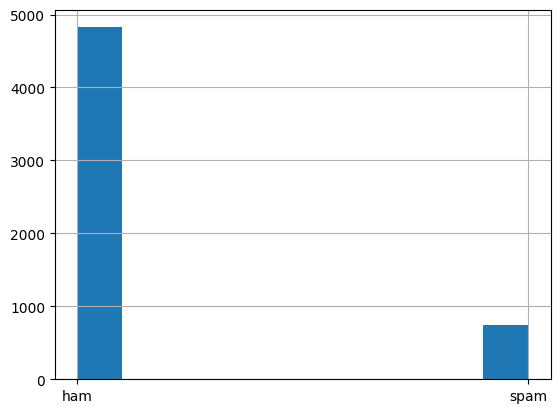

In [ ]:
df['labels'].hist()

In [ ]:
df['b_labels'] = df['labels'].map({'ham' :0 , 'spam' : 1})

In [ ]:
y = df['b_labels'].to_numpy()

In [ ]:
df_train,df_test,ytrain,ytest = train_test_split(df['data'],y,test_size = 0.33)

In [ ]:
featurizer = CountVectorizer(decode_error='ignore')
Xtrain = featurizer.fit_transform(df_train)
Xtest = featurizer.transform(df_test)

#featurizer = TfidfVectorizer(decode_error = 'ignore')
#Xtrain = featurizer.fit_transform(df_train)
#Xtest = featurizer.transform(df_test)


In [ ]:
Xtrain

<3733x7096 sparse matrix of type '<class 'numpy.int64'>'
	with 50060 stored elements in Compressed Sparse Row format>

In [ ]:
model = MultinomialNB()
model.fit(Xtrain,ytrain)

MultinomialNB()

In [ ]:
print(model.score(Xtrain,ytrain))
print(model.score(Xtest,ytest))

0.993838735601393
0.9874932028276238


In [ ]:
ptrain = model.predict(Xtrain)
ptest = model.predict(Xtest)

In [ ]:
print(f1_score(ytrain,ptrain))
print(f1_score(ytest,ptest))

0.9768844221105527
0.9521829521829522


In [ ]:
prob_train =model.predict_proba(Xtrain)[:,1]
prob_test = model.predict_proba(Xtest)[:,1]

In [ ]:
print(roc_auc_score(ytrain,prob_train))
print(roc_auc_score(ytest,prob_test))

0.9914953508823936
0.9839937429506121


In [ ]:
cm = confusion_matrix(ytrain,ptrain)

In [ ]:
cm

array([[3224,    8],
       [  15,  486]])

In [ ]:
def plot_cm(cm):
  classes = ['ham','spam']
  df_cm = pd.DataFrame(cm,index = classes,columns = classes)
  ax = sn.heatmap(df_cm,annot=True,fmt = 'g')
  ax.set_ylabel('Predict')
  ax.set_ylabel('Target')

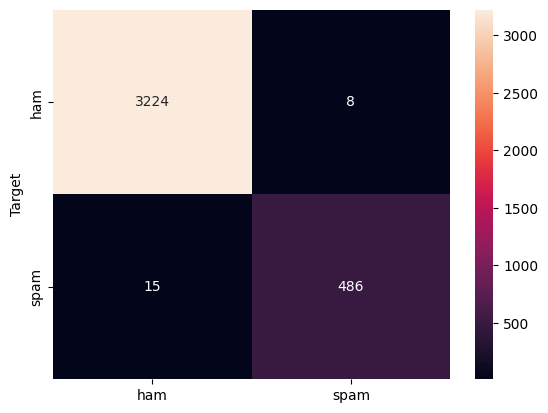

In [ ]:
plot_cm(cm)

In [ ]:
cm_test = confusion_matrix(ytest,ptest)

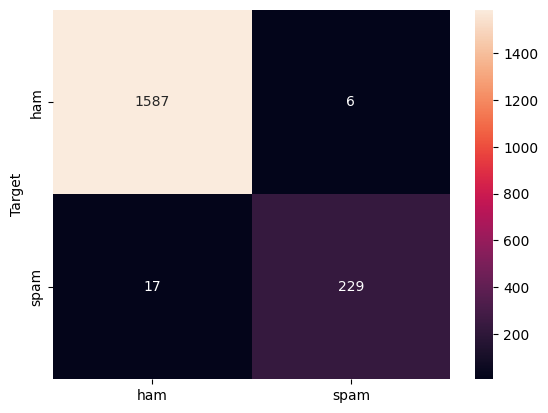

In [ ]:
plot_cm(cm_test)

In [ ]:
def visualize(label):
  words = ''
  for msg in df[df['labels'] == label]['data']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width = 600,height = 400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

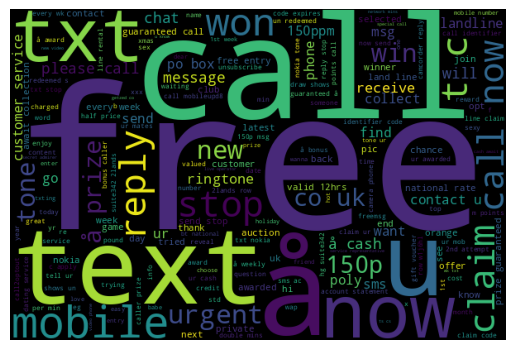

In [ ]:
visualize('spam')

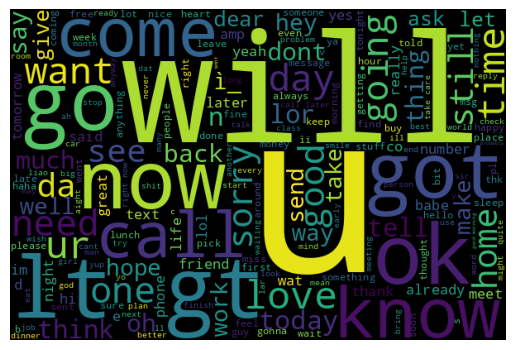

In [ ]:
visualize('ham')

In [ ]:
X = featurizer.transform(df['data'])
df['predictions'] = model.predict(X)

In [ ]:
sneaky_msg = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_msg:
  print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES
SMS. ac sun0819 posts HELLO:\You seem cool
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Talk sexy!! Make new friends or fall in love in the worlds most discreet text dating service. Just text VIP to 83110 and see who you could meet.
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
For sale - arsenal dartboard. Good condition but no doubles or trebles!
Hi its LUCY Hubby at meetins all day Fri & I will B alone at hotel U fancy cumin over? Pls leave msg 2day 09099726395 Lucy x Callså£1/

In [ ]:
not_actually_spam = df[(df['predictions'] == 1 ) & (df['b_labels'] == 0)]['data']

In [ ]:
for msg in not_actually_spam:
  print(msg)

Waiting for your call.
26th OF JULY
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Total video converter free download type this in google search:)
Yavnt tried yet and never played original either
Unlimited texts. Limited minutes.
Mathews or tait or edwards or anderson
Gettin rdy to ship comp
Have you laid your airtel line to rest?
I liked the new mobile
Nokia phone is lovly..
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Dhoni have luck to win some big title.so we will win:)
